In [ ]:
%matplotlib inline

In [3]:
import pandas as pd
iris = pd.read_csv("iris.data")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
setosa = iris[iris["Name"] == "Iris-setosa"]
versicolor = iris[iris["Name"] == "Iris-versicolor"]
virginica = iris[iris["Name"] == "Iris-virginica"]

In [32]:
setosa.sum()  # 合計 
setosa.mean()  # 平均
setosa.median()  # 中央値
setosa.min()  # 最小値
setosa.max()  # 最大値
setosa.corr()  # 相関係数
setosa.var()  # 分散
setosa.std()  # 標準偏差
setosa.cov()  # 共分散

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.124249,0.100298,0.016139,0.010547
SepalWidth,0.100298,0.145180,0.011682,0.011437
PetalLength,0.016139,0.011682,0.030106,0.005698
PetalWidth,0.010547,0.011437,0.005698,0.011494


In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import pyper

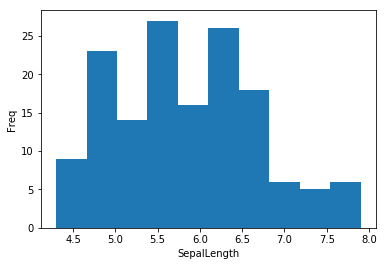

In [11]:
# SepalLengthのヒストグラム
plt.figure()
plt.hist(iris["SepalLength"])
plt.xlabel("SepalLength")
plt.ylabel("Freq")
plt.show()

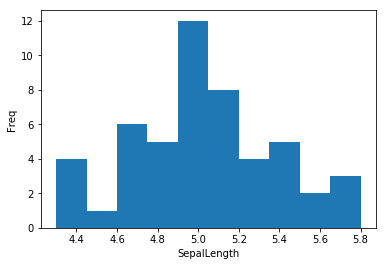

In [12]:
# setosaについてSepalLengthのヒストグラム
plt.figure()
plt.hist(setosa["SepalLength"])
plt.xlabel("SepalLength")
plt.ylabel("Freq")
plt.show()

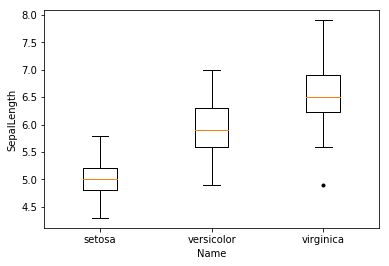

In [14]:
# 品種ごとのSepalLengthについての箱ひげ図
data = [setosa["SepalLength"], versicolor["SepalLength"], virginica["SepalLength"]]
plt.figure()
plt.boxplot(data, sym="k.")
plt.xlabel("Name")
plt.ylabel("SepalLength")
ax = plt.gca()
plt.setp(ax, xticklabels=["setosa", "versicolor", "virginica"])
plt.show()

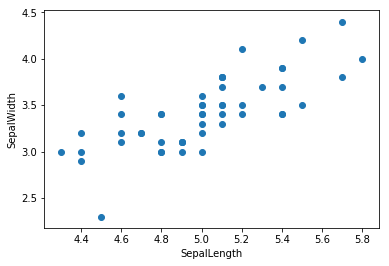

In [15]:
# 二変量の散布図
plt.scatter(setosa["SepalLength"], setosa["SepalWidth"])
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()

In [16]:
# 正の相関があるように見えるので、相関係数を求める
corr = np.corrcoef(setosa["SepalLength"], setosa["SepalWidth"])
print(corr[0,1])

0.746780373264


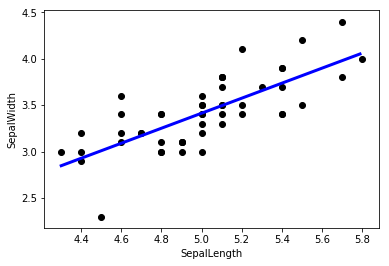

[[ 0.80723367]]
[-0.62301173]
0.557680925892


In [24]:
# 単回帰分析
from sklearn import linear_model
LinerRegr = linear_model.LinearRegression()
X = setosa[["SepalLength"]]
Y = setosa[["SepalWidth"]]
LinerRegr.fit(X, Y)
plt.scatter(X,Y,color="black")
px = np.arange(X.min(), X.max(), .01)[:,np.newaxis]
py = LinerRegr.predict(px)
plt.plot(px, py, color="blue", linewidth=3)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()
print(LinerRegr.coef_)  # 回帰係数
print(LinerRegr.intercept_)  # 切片
print(LinerRegr.score(X, Y))  # 決定係数

In [25]:
# 重回帰分析
from sklearn import linear_model
LinerRegr = linear_model.LinearRegression()
X = setosa[["SepalLength"]]
Y = setosa[["SepalWidth"]]
LinerRegr.fit(X, Y)
print(LinerRegr.score(X,Y))  # 決定係数

0.557680925892


In [26]:
import pyper
r = pyper.R(use_pandas='True')
r.assign('data', iris)
r('rlm <- lm(Sepal.Width ~ Sepal.Length + Petal.Length + Petal.Width, data=iris)')
print(r('summary(rlm)'))

try({summary(rlm)})

Call:
lm(formula = Sepal.Width ~ Sepal.Length + Petal.Length + Petal.Width, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88045 -0.20945  0.01426  0.17942  0.78125 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.04309    0.27058   3.855 0.000173 ***
Sepal.Length  0.60707    0.06217   9.765  < 2e-16 ***
Petal.Length -0.58603    0.06214  -9.431  < 2e-16 ***
Petal.Width   0.55803    0.12256   4.553  1.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3038 on 146 degrees of freedom
Multiple R-squared:  0.524,	Adjusted R-squared:  0.5142 
F-statistic: 53.58 on 3 and 146 DF,  p-value: < 2.2e-16




In [28]:
# ダミー変数を作る
dummies = pd.get_dummies(iris["Name"])
iris = pd.concat([iris,dummies], axis=1)

In [31]:
# 回帰係数と切片を求める
LinerRegr = linear_model.LinearRegression()
X = iris[["Iris-virginica", "Iris-versicolor"]]
Y = iris[["SepalLength"]]
LinerRegr.fit(X,Y)
print(LinerRegr.coef_)  # 回帰係数
print(LinerRegr.intercept_)  # 切片

[[ 1.582  0.93 ]]
[ 5.006]
